<div style="text-align:center">  
    <h1>Zomato Restaurant Clustering Unsupervised ML Project</h1><br>
    <img src="https://upload.wikimedia.org/wikipedia/commons/7/75/Zomato_logo.png" width="300" height="300"/>
</div>

# **Project Summary**

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member: Sagar Dibya**


**This project utilized advanced data analytics techniques to analyze restaurants and customer feedback on Zomato, a popular online food delivery platform.**
* The dataset included restaurant names, locations, cuisines, average costs for two, ratings, and user reviews. After data cleaning and preprocessing, including removing duplicates and handling missing values, I applied k-means clustering to group similar restaurants based on location, cuisines, and average cost. The elbow method helped determine the optimal number of clusters.
*Sentiment analysis was performed on user reviews to classify them as positive, negative, or neutral, and word clouds visualized frequently used terms. The analysis grouped restaurants into five clusters, revealing positive overall customer sentiment.
*This project demonstrates the power of clustering and sentiment analysis for understanding restaurant data on Zomato, offering valuable insights to both restaurants and customers, and can be extended to analyze eating habits in other regions.


# **Problem Statement**

The objective of this project is to analyze and gain insights into the restaurant industry in India using data from Zomato, a prominent restaurant aggregator and food delivery startup. The focus is on understanding customer sentiment from reviews, segmenting restaurants into different clusters, and drawing meaningful conclusions through data visualizations. Key areas of analysis include cuisine types, pricing, and customer feedback. The project aims to help customers find the best restaurants in their locality while providing Zomato with valuable insights for identifying growth opportunities and improving their services. Additionally, sentiment analysis and reviewer metadata will be utilized to identify industry critics.

## Customer Sentiment Analysis
The project aims to analyze customer sentiments expressed in reviews. By using sentiment analysis techniques, we will gauge the overall satisfaction levels of customers with the restaurants listed on Zomato. This analysis will provide actionable insights into the strengths and weaknesses of different establishments, helping potential diners make informed choices and assisting Zomato in enhancing its user experience.

## Restaurant Clustering
Another key aspect of the project is clustering Zomato's restaurant database. By applying clustering algorithms, we will group restaurants with similar characteristics, such as cuisine types, pricing, and user ratings. This segmentation will facilitate a better understanding of the restaurant landscape and provide Zomato with strategic information to address specific business challenges.

## Business Case Solutions
The insights generated from customer sentiment analysis and restaurant clustering will help solve several business cases. For customers, it will assist in finding the best restaurants in their area based on peer reviews. For Zomato, the analysis will identify areas for improvement and growth opportunities, allowing the company to refine its services and cater to changing customer preferences.

# **GitHub Link**

# ***Let's Begin !***

## **Importing libraries and data**

In [8]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer


import warnings
warnings.filterwarnings('ignore')

In [9]:
# Mounting the Google drive where the dataset is saved
from google.colab import drive
drive.mount('/content/drive')

# Defining the directory path where the data file is stored
directory_path = "/content/drive/MyDrive/Zomato/"

# Loading the dataset as pandas data frame
restaurant_data = pd.read_csv(directory_path + "Zomato Restaurant data.csv")
reviews = pd.read_csv(directory_path + "Zomato reviews.csv")


print("restaurant_data shape:",restaurant_data.shape)
print("reviews shape:",reviews.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
restaurant_data shape: (105, 6)
reviews shape: (10000, 7)


In [10]:
restaurant_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [11]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


## ***Understanding Your Variables***

Before proceeding with any analysis, it's crucial to examine the dataset's structure to grasp its organization and layout. This initial step will facilitate a better understanding of how the data is arranged and stored.

In [12]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [14]:
# Check for duplicates
print("Duplicates in restaurant_data:",restaurant_data.duplicated().sum())
print("Duplicates in reviews:",reviews.duplicated().sum())

Duplicates in restaurant_data: 0
Duplicates in reviews: 36


#### Missing Values/Null Values

In [15]:
# Check for missing values
print("Missing values in restaurant_data:")
print(restaurant_data.isnull().sum(),"\n")
print("Missing values in reviews:")
print(reviews.isnull().sum())

Missing values in restaurant_data:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

Missing values in reviews:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


<Axes: >

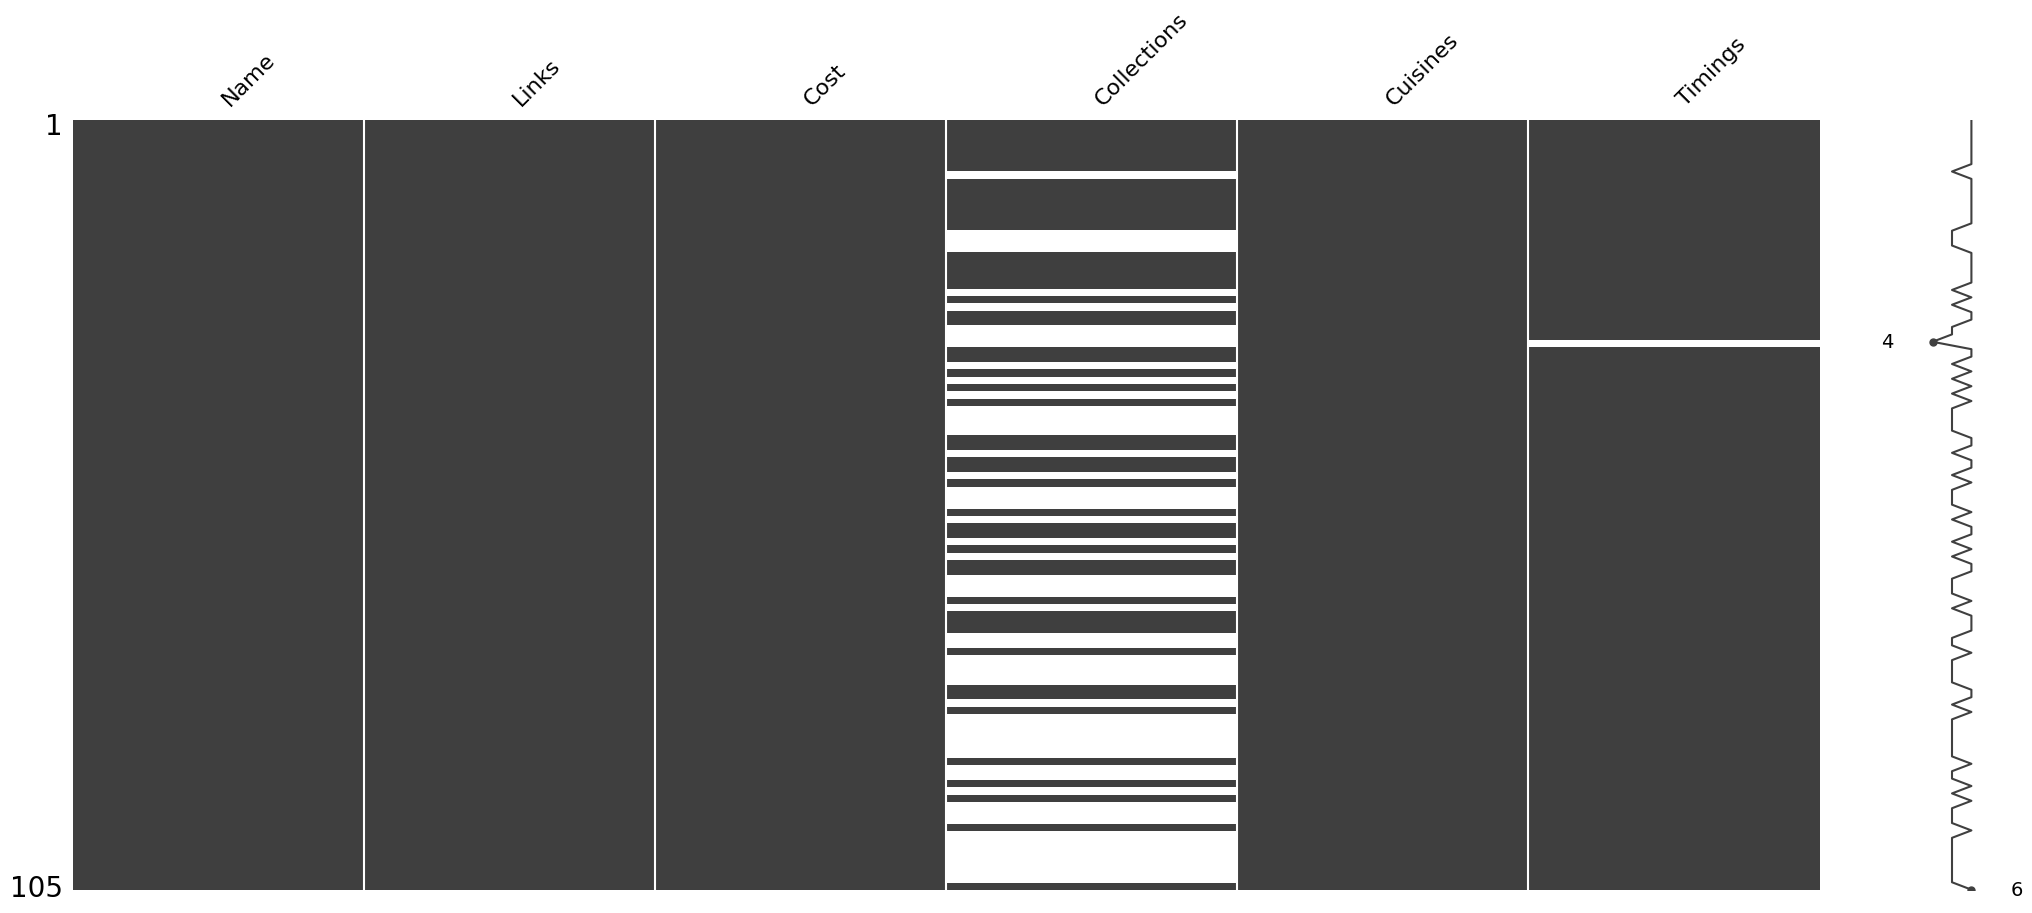

In [16]:
# Visualizing the missing values using missingno
missingno.matrix(restaurant_data)

<Axes: >

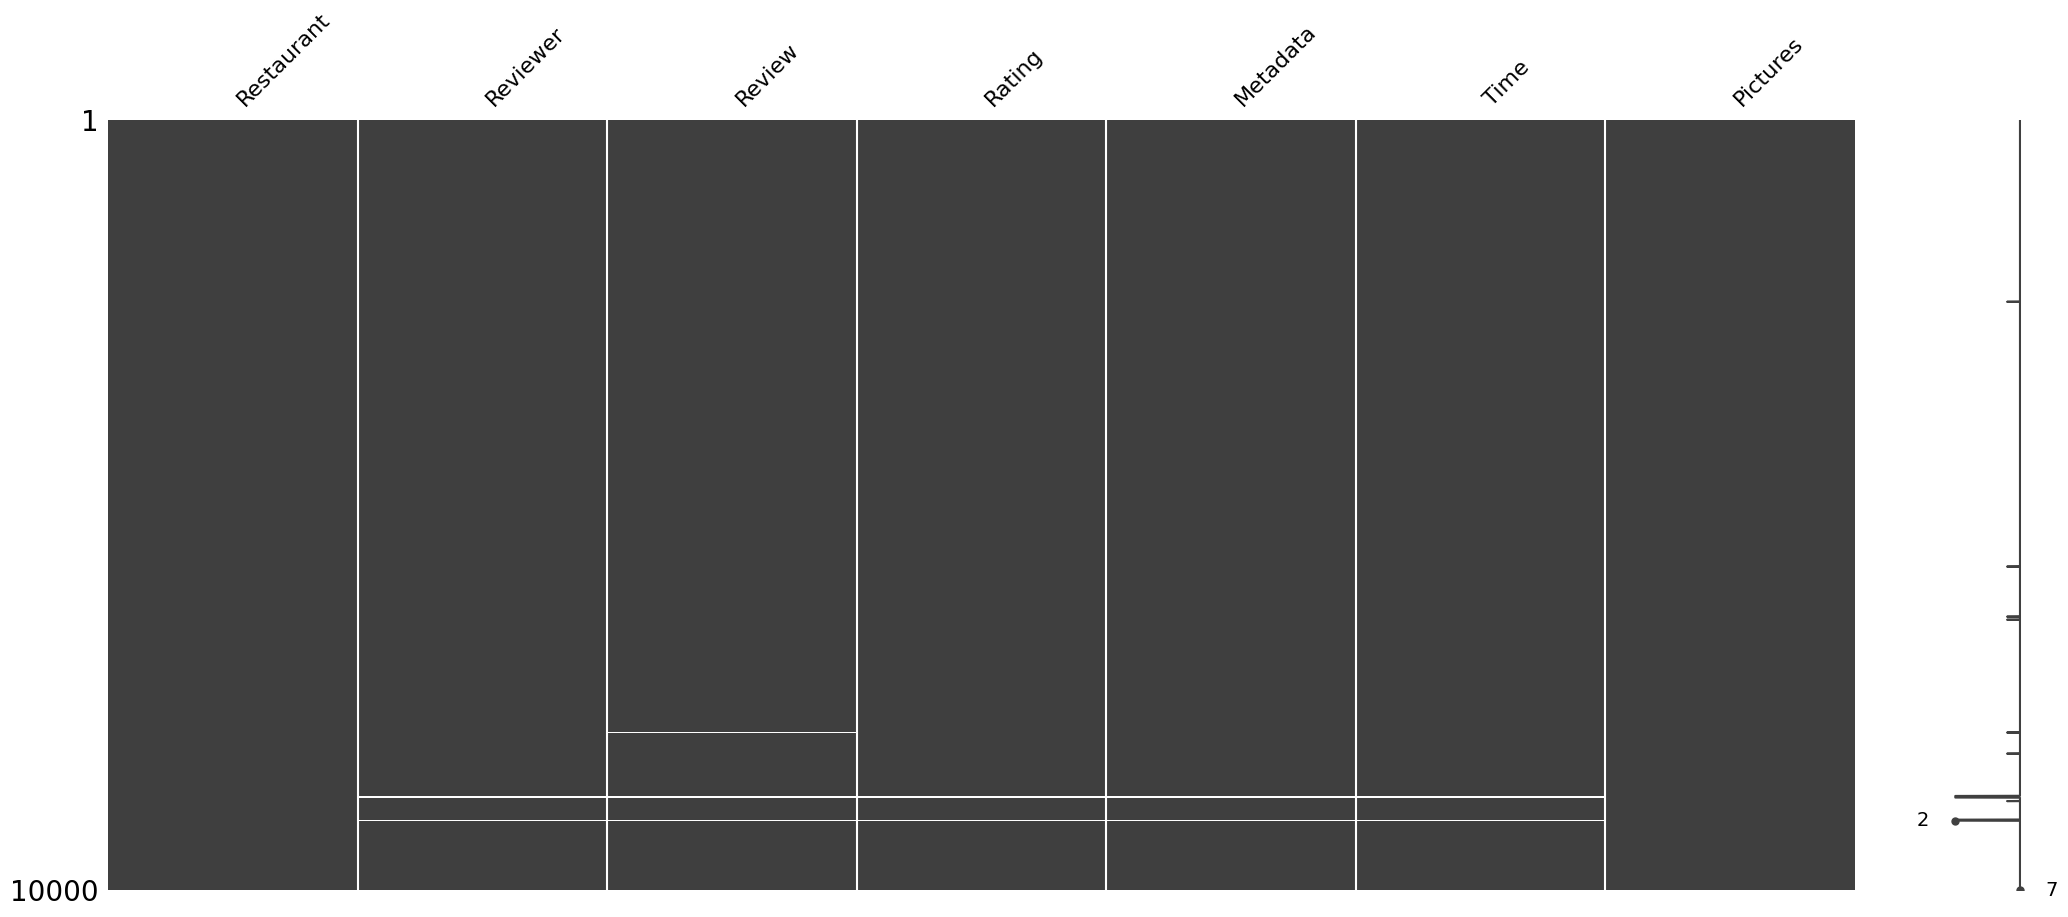

In [17]:
missingno.matrix(reviews)

### What did you know about your dataset?


Restaurant DataSet:
The dataset contains 105 observations with 6 features. Some features, such as collection and timing, have null values. There are no duplicate records, meaning all 105 entries are unique. The cost feature, which represents monetary values, is stored as an object data type due to comma separation. Similarly, the timing feature, representing operational hours, is also stored as an object data type because it is in text format.

Review DataSet:
This dataset comprises 10,000 observations and 7 features. Except for the picture and restaurant features, all other features have null values. There are 36 duplicate entries for two restaurants—American Wild Wings and Arena Eleven—where these duplicates generally have null values. The rating feature, which is ordinal data, is stored as an object data type but should be an integer. The timing feature, representing the time when the review was posted, is stored as an object data type and should be converted to a datetime format.

In [18]:
restaurant_data.Cuisines

,Cuisines
0,"Chinese, Continental, Kebab, European, South I..."
1,"Biryani, North Indian, Chinese"
2,"Asian, Mediterranean, North Indian, Desserts"
3,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,"Asian, Continental, North Indian, Chinese, Med..."
...,...
100,"Fast Food, Salad"
101,"Bakery, Mithai"
102,"North Indian, Biryani, Chinese"
103,Fast Food


In [19]:
restaurant_data.Cuisines_list = restaurant_data.Cuisines.apply(lambda x: x.lower().replace(" ","").split(","))
restaurant_data.Cuisines_list

cusines_set = set()
for cuisines in restaurant_data.Cuisines_list:
  cusines_set.update(cuisines)
cusines_set
print("Total No. of cuisines",len(cusines_set))
print(cusines_set)

Total No. of cuisines 44
{'chinese', 'biryani', 'beverages', 'burger', 'goan', 'seafood', 'fingerfood', 'italian', 'cafe', 'spanish', 'healthyfood', 'arabian', 'mexican', 'indonesian', 'salad', 'andhra', 'desserts', 'juices', 'lebanese', 'mediterranean', 'malaysian', 'southindian', 'fastfood', 'thai', 'european', 'momos', 'japanese', 'northeastern', 'sushi', 'continental', 'streetfood', 'hyderabadi', 'bakery', 'modernindian', 'bbq', 'kebab', 'mithai', 'wraps', 'icecream', 'american', 'asian', 'pizza', 'northindian', 'mughlai'}


In [20]:
restaurant_data

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [21]:
# Replacing non-numerical values in the 'Rating' column with NaN
reviews['Rating'] = pd.to_numeric(reviews['Rating'], errors='coerce')

# Filling NaN values with the median of the numeric ratings
reviews['Rating'].fillna(reviews['Rating'].median(), inplace=True)

## ***2. Understanding Your Variables***

In [22]:
# Dataset Columns
print("Features in restaurent data: ",restaurant_data.columns.tolist())
print("Features in review data: ",reviews.columns.tolist())

Features in restaurent data:  ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Features in review data:  ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [23]:
# Dataset Describe
restaurant_data.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [24]:
reviews.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,10000.000000,9962,9962,10000.000000
unique,100,7446,9364,NaN,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,NaN,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,NaN,919,3,NaN
mean,NaN,NaN,NaN,3.602600,NaN,NaN,0.748600
std,NaN,NaN,NaN,1.480774,NaN,NaN,2.570381
min,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,0.000000


### Variables Description

### Restaurant Data:
- Name: Name of Restaurants
- Links: URL Links of Restaurants
- Cost: Per person estimated cost of dining
- Collection: Tagging of Restaurants w.r.t. Zomato categories
- Cuisines: Cuisines served by restaurants
- Timings: Restaurant timings

### Review Data:
- Reviewer: Name of the reviewer
- Review: Review text
- Rating: Rating provided
- MetaData: Reviewer metadata - Number of reviews and followers
- Time: Date and Time of Review
- Pictures: Number of pictures posted with review

### Check Unique Values for each variable.

In [25]:
# Check Unique Values for each variable.
for i in restaurant_data.columns.tolist():
  print("Unique",i,":",restaurant_data[i].nunique(),"\n")

Unique Name : 105 

Unique Links : 105 

Unique Cost : 29 

Unique Collections : 42 

Unique Cuisines : 92 

Unique Timings : 77 



In [26]:
# Check Unique Values for each variable.
for i in reviews.columns.tolist():
  print("Unique",i,":",reviews[i].nunique(),"\n")

Unique Restaurant : 100 

Unique Reviewer : 7446 

Unique Review : 9364 

Unique Rating : 9 

Unique Metadata : 2477 

Unique Time : 9782 

Unique Pictures : 36 



## 3. ***Data Wrangling***

### Data Wrangling

In [27]:
#  Handling missing values

# Dropping collections column since most of the values are null
restaurant_data.drop("Collections",axis=1,inplace=True)

# Dropping remaining null values from restaurant_data and reviews since they are very few
restaurant_data.dropna(inplace=True)
reviews.dropna(inplace=True)

# Check for missing values After handling
print("Missing values in restaurant_data:")
print(restaurant_data.isnull().sum(),"\n")
print("Missing values in reviews:")
print(reviews.isnull().sum())

Missing values in restaurant_data:
Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64 

Missing values in reviews:
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


In [28]:
# Drop duplicate rows
restaurant_data.drop_duplicates(inplace=True)
reviews.drop_duplicates(inplace=True)
print("restaurant_data shape:",restaurant_data.shape)
print("reviews shape:",reviews.shape)

restaurant_data shape: (104, 5)
reviews shape: (9955, 7)


In [29]:
# Lets extract cuisines from the Cuisines(string) column and store as a list
print("Cuisines data Before preprocessing:\n")
print(restaurant_data.Cuisines[0])
print("\nCuisines data After preprocessing:\n")
print("",restaurant_data.Cuisines[0].lower().replace(" ","").split(","))

Cuisines data Before preprocessing:

Chinese, Continental, Kebab, European, South Indian, North Indian

Cuisines data After preprocessing:

 ['chinese', 'continental', 'kebab', 'european', 'southindian', 'northindian']


In [30]:
# Lets apply the preprocessing steps on the Cuisines column
restaurant_data["Cuisines_list"] = restaurant_data.Cuisines.apply(lambda x: x.lower().replace(" ","").split(","))

# Lets check the names of count of unique cuisines
cusines_set = set()
for cuisines in restaurant_data.Cuisines_list:
  cusines_set.update(cuisines)
print("Total number of unique cuisines: ",len(cusines_set))
cusines_set

Total number of unique cuisines:  44


{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fastfood',
 'fingerfood',
 'goan',
 'healthyfood',
 'hyderabadi',
 'icecream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modernindian',
 'momos',
 'mughlai',
 'northeastern',
 'northindian',
 'pizza',
 'salad',
 'seafood',
 'southindian',
 'spanish',
 'streetfood',
 'sushi',
 'thai',
 'wraps'}

In [31]:
# Preprocess and convert the cost column to int data type
restaurant_data.Cost = restaurant_data.Cost.apply(lambda x: x.replace(",","")).astype(int)
restaurant_data.Cost

,Cost
0,800
1,800
2,1300
3,800
4,1200
...,...
100,600
101,200
102,500
103,250


In [32]:
restaurant_data.Cost.describe()

,Cost
count,104.000000
mean,861.057692
std,512.605979
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


In [33]:
restaurant_data[["Name","Cost","Cuisines_list"]]

,Name,Cost,Cuisines_list
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,1300,"[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"[asian, continental, northindian, chinese, med..."
...,...,...,...
100,IndiBlaze,600,"[fastfood, salad]"
101,Sweet Basket,200,"[bakery, mithai]"
102,Angaara Counts 3,500,"[northindian, biryani, chinese]"
103,Wich Please,250,[fastfood]


## Data Wrangling on Reviews

In [34]:
# replace non numbers with NAN
reviews.Rating = pd.to_numeric(reviews.Rating, errors='coerce')

In [35]:
reviews.Rating.fillna(reviews.Rating.mean(), inplace=True)

In [36]:
# Checking the Metadata column to create a regex expression
followers = reviews.Metadata.apply(lambda x: x.split(",")[-1])
print(followers.apply(lambda x: x.split(" ")[-1]).value_counts())

review_count = reviews.Metadata.apply(lambda x: x.split(",")[0])
print(review_count.apply(lambda x: x.split(" ")[-1]).value_counts())

Metadata
Followers    6748
Follower     1633
Review        916
Reviews       658
Name: count, dtype: int64
Metadata
           8381
Review      916
Reviews     658
Name: count, dtype: int64


In [37]:
import re
def extract_follower_and_review_count(text):

    # Define regular expressions for review and followers
    review_pattern = r'(\d+) Review'
    followers_pattern = r'(\d+) Follower'

    # Search for the review and followers using regex
    review_match = re.search(review_pattern, text)
    followers_match = re.search(followers_pattern, text)

    # Extract the review and followers values
    review = review_match.group(1) if review_match else 0
    followers = followers_match.group(1) if followers_match else 0
    return [review, followers]

extract_follower_and_review_count("1 Review , 22 Follower")

['1', '22']

In [38]:
reviews[['prev_reviews_count', 'followers_count']] = reviews['Metadata'].apply(extract_follower_and_review_count).apply(pd.Series)

In [39]:
reviews.drop('Metadata', axis=1, inplace=True)

In [40]:
merged_restaurant_data = pd.merge(reviews, restaurant_data[["Name","Cost","Cuisines_list"]], left_on='Restaurant', right_on='Name')
merged_restaurant_data

,Restaurant,Reviewer,Review,Rating,Time,Pictures,prev_reviews_count,followers_count,Name,Cost,Cuisines_list
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
...,...,...,...,...,...,...,...,...,...,...,...
9850,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,6/5/2016 0:08,0,53,54,Chinese Pavilion,1000,"[chinese, seafood]"
9851,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,6/4/2016 22:01,0,2,53,Chinese Pavilion,1000,"[chinese, seafood]"
9852,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,6/3/2016 10:37,3,65,423,Chinese Pavilion,1000,"[chinese, seafood]"
9853,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,5/31/2016 17:22,0,13,144,Chinese Pavilion,1000,"[chinese, seafood]"


### What all manipulations have you done and insights you found?

Removed missing values and duplicates
Extracted cuisines from the Cuisines column
Converted the cost column to integer data type
Insights

There are 44 unique cuisines across 104 restaurants.
The estimated dining cost for all 104 restaurants ranges from 150 Rs to 2800 Rs.
By extracting locations from the links column, it is observed that all restaurants are located in Gachibowli, Hyderabad.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Visualization

#### Chart - 1 - Distribution of Cost, Rating (Univariate)

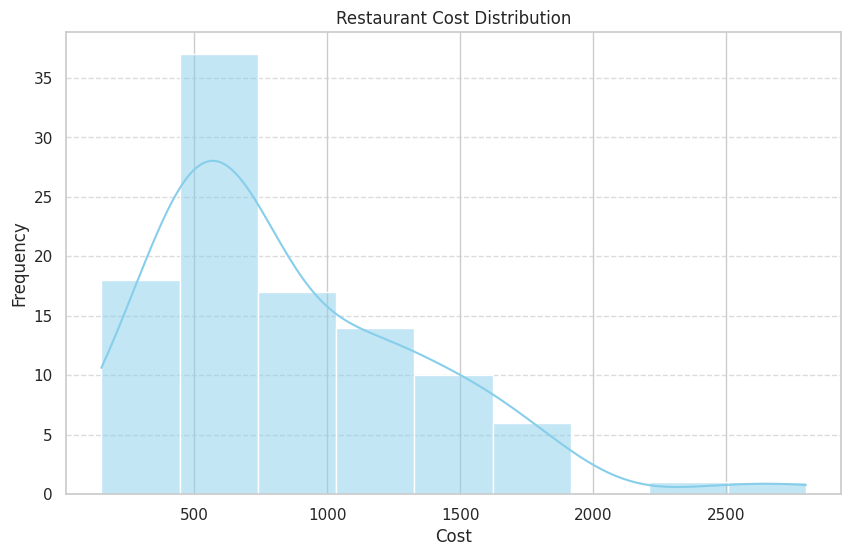


 count     104.000000
mean      861.057692
std       512.605979
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64


In [48]:
#@title Restaurant Cost Distribution
# Bivariate with Categorical - Numerical
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=restaurant_data, x='Cost', kde=True, color='skyblue')
plt.title('Restaurant Cost Distribution')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n",restaurant_data['Cost'].describe())

##### 1. What is/are the insight(s) found from the chart?

- The average cost per person is 861 Rs With a std. deviation of 515 Rs
- Min observed cost is 150 and max is 2800


 count    9955.000000
mean        3.600301
std         1.483504
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64


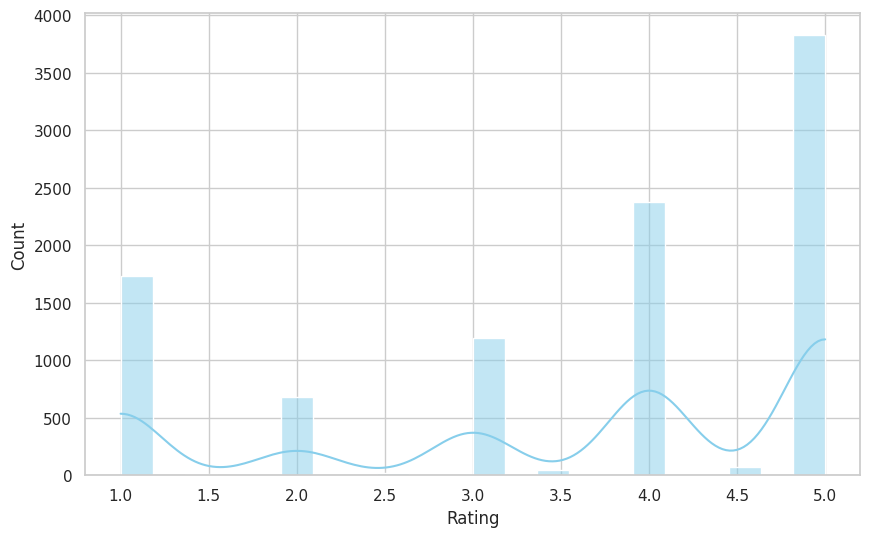

In [49]:
#@title Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data = reviews, x = 'Rating', kde = True, color = 'skyblue')

print("\n",reviews['Rating'].describe())

##### 1. What is/are the insight(s) found from the chart?

 - The average rating is 3.6 indicating a majority of postitive ratings
 - We can see two peaks in the distribution at 1 and 5 indicating that customers tend to have strong opinions about their experiences, either very good or very bad, rather than neutral or average.

#### Chart - 2 - Most popular cuisines (Univariate)

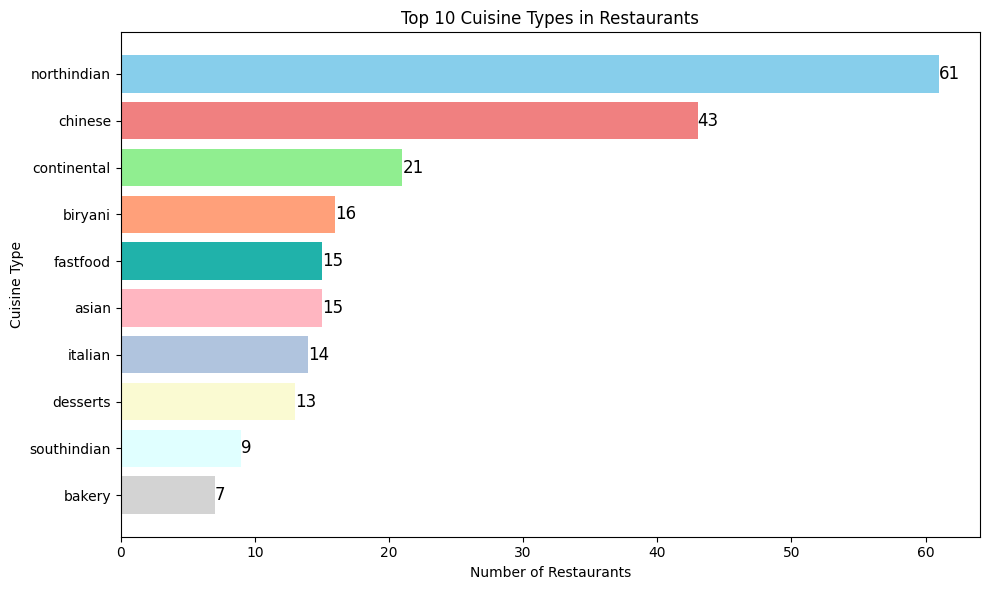

In [43]:
#@title Top 10 Cuisines
all_cuisines = []

for cuisine_list in restaurant_data.Cuisines_list:
    for cuisine in cuisine_list:
        all_cuisines.append(cuisine)

# Count the occurrences of each cuisine type
cuisine_counts = pd.Series(all_cuisines).value_counts()

# Choose the top N cuisine types to display on the y-axis
top_n = 10  # You can change this number as needed
cuisine_counts = cuisine_counts.head(top_n)

# custom color palette
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue', 'lightgoldenrodyellow', 'lightcyan', 'lightgray']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(cuisine_counts.index, cuisine_counts.values, color=colors)

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', ha='left', va='center', fontsize=12, color='black')

plt.title('Top {} Cuisine Types in Restaurants'.format(top_n))
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most common cuisine at the top

plt.tight_layout()
plt.show()


##### 1. What is/are the insight(s) found from the chart?

- Northindian seems to be the most popular cuisine and south indian and bakery to be the least popular

#### Chart - 3 - Restaurant Costs vs cuisines

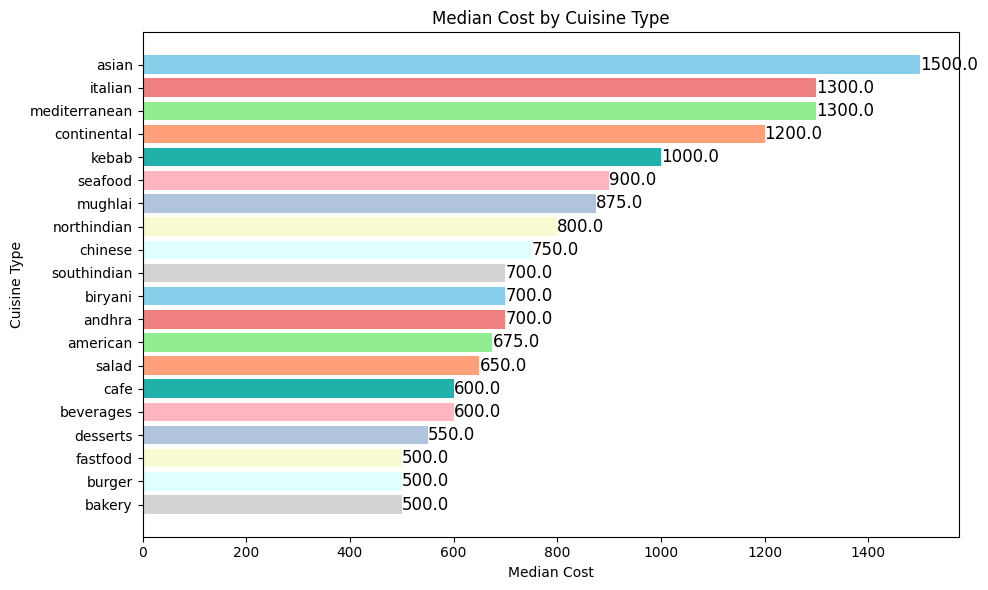

In [44]:
#@ title Average Cost of Cuisines
# Reset index to ensure it's unique
restaurant_data.reset_index(drop=True, inplace=True)

# Explode the 'Cuisines_list' column to create multiple rows for each cuisine type
exploded_cuisines = restaurant_data['Cuisines_list'].explode()

# Create a DataFrame from the exploded cuisines and 'Cost' column
cuisine_cost_df = pd.DataFrame({'Cuisine Type': exploded_cuisines, 'Cost': restaurant_data['Cost']})

# Count the occurrences of each cuisine type and select the top 20
top_20_cuisines = cuisine_cost_df['Cuisine Type'].value_counts().head(20).index
# Filter the DataFrame to include only the top 20 cuisines
cuisine_cost_df_top_20 = cuisine_cost_df[cuisine_cost_df['Cuisine Type'].isin(top_20_cuisines)]

# Calculate the average cost for each cuisine type and sort by average cost
average_cost_by_cuisine = cuisine_cost_df_top_20.groupby('Cuisine Type')['Cost'].median().sort_values(ascending=False).reset_index()

# Custom color palette
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue', 'lightgoldenrodyellow', 'lightcyan', 'lightgray']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(average_cost_by_cuisine['Cuisine Type'], average_cost_by_cuisine['Cost'], color=colors)

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', ha='left', va='center', fontsize=12, color='black')

plt.title('Median Cost by Cuisine Type')
plt.xlabel('Median Cost')
plt.ylabel('Cuisine Type')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest median cost at the top

plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?

- From the above plot the median cost of cuisine is highest for asian followed by italian and mediterranean
- With the lowest being fastfoods, burgers and bakery


#### Chart - 5 - Affordable and Expensive Restaurents (Bivariate)

In [ ]:
#@title Top 20 Expensive and Affordable Restaurants
# Sort the DataFrame by cost in ascending order (affordable to expensive)
affordable_restaurants = restaurant_data.sort_values(by='Cost', ascending=False).tail(20)

# Sort the DataFrame by cost in descending order (expensive to affordable)
expensive_restaurants = restaurant_data.sort_values(by='Cost', ascending=False).head(20)

# Concatenate both DataFrames to create a single DataFrame with the top 20 affordable and top 20 expensive restaurants
top_restaurants = pd.concat([expensive_restaurants,affordable_restaurants])

# Create a bar plot to visualize the top 20 affordable and top 20 expensive restaurants
plt.figure(figsize=(12, 8))
plt.barh(top_restaurants['Name'], top_restaurants['Cost'], color='skyblue')
plt.title('Top 20 Affordable and Expensive Restaurants')
plt.xlabel('Cost')
plt.ylabel('Restaurant Name')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest cost at the top
plt.tight_layout()

plt.show()

print("\n Statistics for top 20 expensive restaurants")
print(expensive_restaurants.describe())
print("\n Statistics for top 20 affordable restaurants")
print(affordable_restaurants.describe())


##### 2. What is/are the insight(s) found from the chart?

- The top expensive restaurants are, on average, about 5.4 times more costly than the top affordable restaurants.

- This data could help consumers make decisions based on their budget.

#### Chart - 4 - Variation of Ratings W.R.T time (Bivariate with Categorical - Numerical)

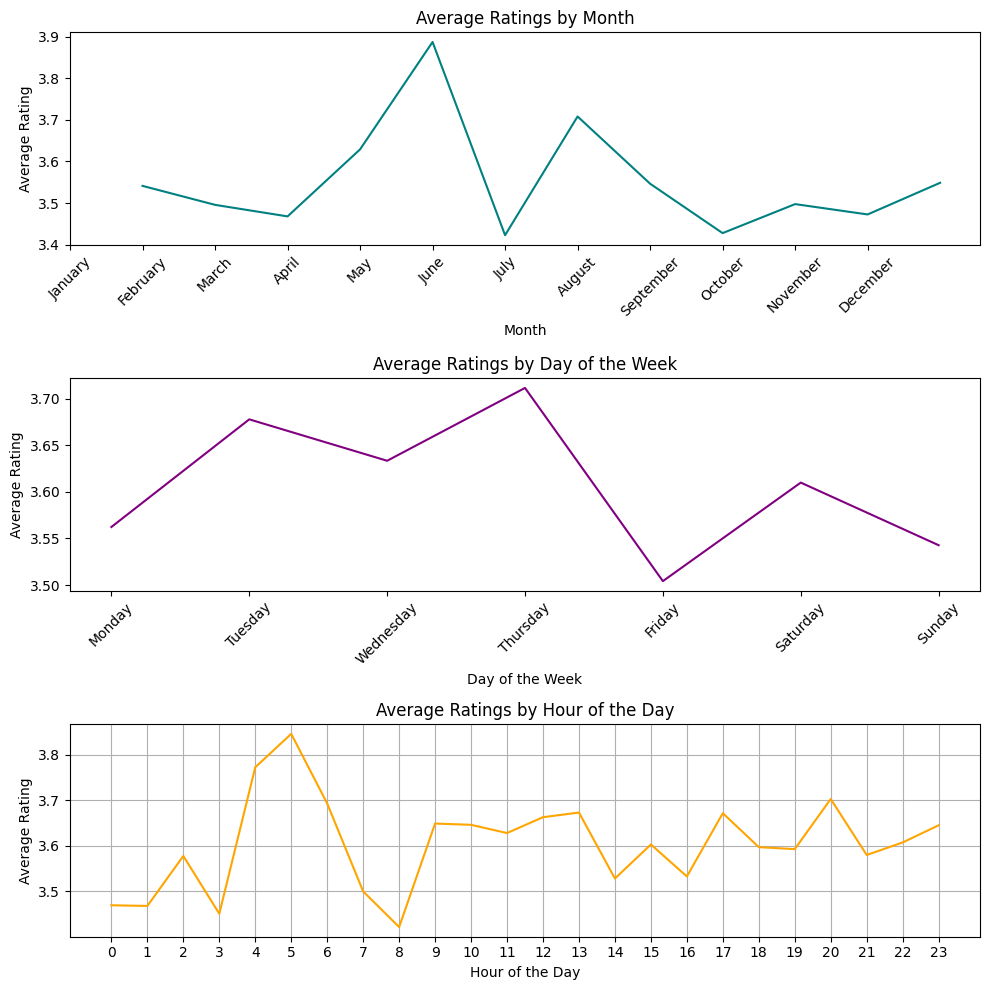

In [46]:
#@title Trend Analysis
import pandas as pd
import datetime as dt

# Converting 'Time' column to datetime
reviews['Time'] = pd.to_datetime(reviews['Time'])

# Extracting month, day of the week, and hour
reviews['Month'] = reviews['Time'].dt.month
reviews['DayOfWeek'] = reviews['Time'].dt.day_name()
reviews['Hour'] = reviews['Time'].dt.hour

# Seasonal Trend Analysis: Average Rating by Month
monthly_avg_rating = reviews.groupby('Month')['Rating'].mean()

# Weekly Trend Analysis: Average Rating by Day of the Week
weekly_avg_rating = reviews.groupby('DayOfWeek')['Rating'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Hourly Trend Analysis: Average Rating by Hour of the Day
hourly_avg_rating = reviews.groupby('Hour')['Rating'].mean()

# Plotting all three trends in a single figure with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Monthly Trend Plot
axs[0].plot(monthly_avg_rating, color='teal')
axs[0].set_title('Average Ratings by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average Rating')
axs[0].set_xticks(range(0, 12))
axs[0].set_xticklabels([dt.date(2000, m, 1).strftime('%B') for m in range(1, 13)])
axs[0].tick_params(axis='x', rotation=45)

# Weekly Trend Plot
axs[1].plot(weekly_avg_rating, color='purple')
axs[1].set_title('Average Ratings by Day of the Week')
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Average Rating')
axs[1].set_xticks(range(7))
axs[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axs[1].tick_params(axis='x', rotation=45)

# Hourly Trend Plot
axs[2].plot(hourly_avg_rating, color='orange')
axs[2].set_title('Average Ratings by Hour of the Day')
axs[2].set_xlabel('Hour of the Day')
axs[2].set_ylabel('Average Rating')
axs[2].set_xticks(range(0, 24))
axs[2].grid(True)

plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Average Ratings by Month:

There is a noticeable peak in June, indicating the highest average ratings occur during this month.
Lower points are observed, particularly in April and September, suggesting a potential seasonal impact on ratings.
Average Ratings by Day of the Week:

Ratings peak mid-week, especially on Wednesday, and decline towards the weekend.
The lowest average ratings are seen on Friday.
Average Ratings by Hour of the Day:

Peaks are observed in the early hours (around 5 AM), mid-morning (around 9 AM), and late evening (around 8 PM).
Notable dips occur in the late morning (around 7-8 AM) and early evening (around 2-4 PM).
Business Implications:

Positive Impact: Insights can inform targeted marketing during peak times, quality control measures for periods of lower ratings, and staffing adjustments to ensure high service quality during critical hours or days.
Strategic Applications:

Seasonal Adjustments: The variation in monthly ratings suggests that restaurants could adjust their offerings or operations seasonally, such as providing summer specials or comfort food during colder months.

Weekly Planning: Understanding that ratings dip over the weekend may imply higher customer expectations or operational challenges on these days.

Hourly Focus: Hourly variations might reflect changes in customer base or staff shifts. Paying special attention to service quality during known low points and maintaining high standards during peak times could improve overall ratings.

#### Chart - 6 Variation of Ratings with Cost

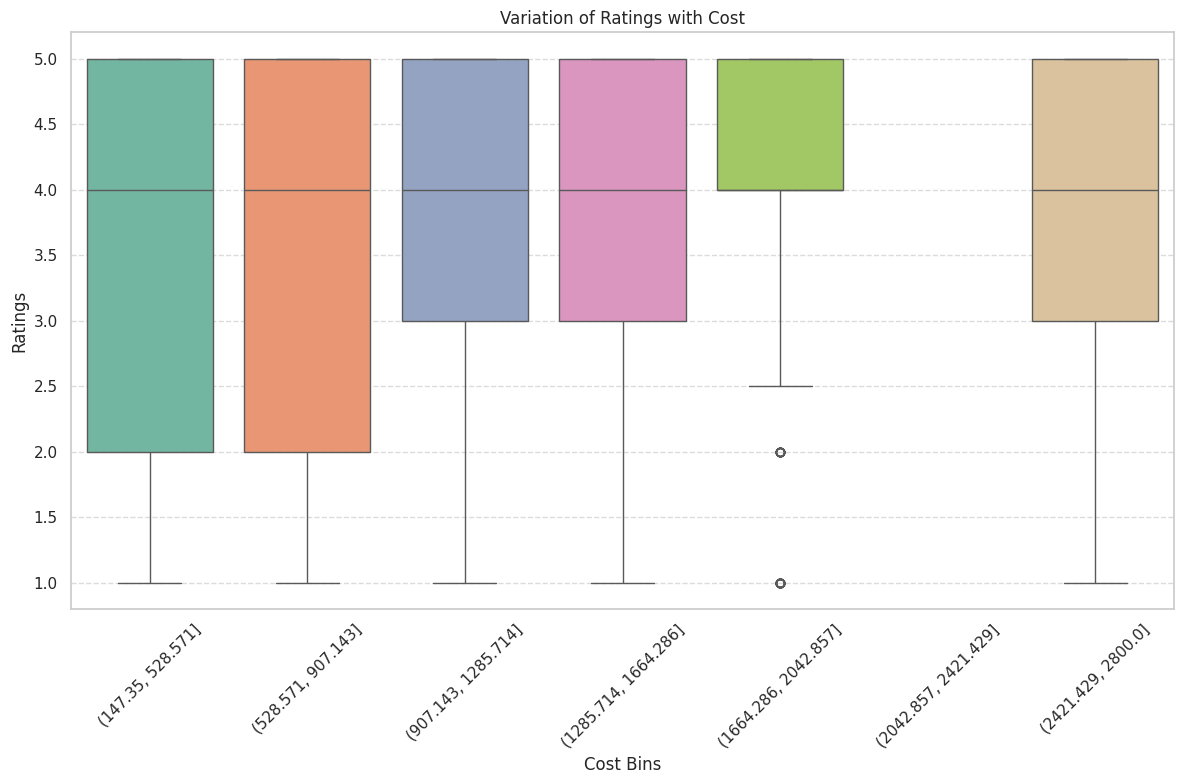

In [47]:
#@title Cost Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced styling

# Assuming you have already loaded your data and merged it as shown in your code

# Create 10 bins for the 'Cost' column
merged_restaurant_data['Cost_Bin'] = pd.cut(merged_restaurant_data['Cost'], bins=7)

# Set a custom color palette for the plot
colors = sns.color_palette("Set2")

# Create a box plot with seaborn for better styling
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set the style to whitegrid
sns.boxplot(x='Cost_Bin', y='Rating', data=merged_restaurant_data, palette=colors)
plt.xticks(rotation=45)
plt.title('Variation of Ratings with Cost')
plt.xlabel('Cost Bins')
plt.ylabel('Ratings')

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the plot further as needed, e.g., adjusting fonts, colors, etc.

plt.tight_layout()  # Ensure the plot is well-fit within the figure
plt.show()


Higher Cost, Higher Ratings: The highest cost bin [(2421, 2800)] shows the highest median rating, suggesting that more expensive restaurants tend to receive better ratings. This could be due to perceived higher quality, service, or overall experience.

Spread of Ratings: The box plots illustrate the interquartile range (IQR) of ratings for each cost bin. The IQR is tighter for lower and middle cost bins, indicating more consistent ratings in these categories. In contrast, the highest cost bin has a larger IQR, suggesting greater variability in ratings for more expensive restaurants.

Presence of Outliers: Outliers are present in both lower and higher cost bins, as shown by dots outside the main "box" in the box plot. This indicates some restaurants have ratings significantly lower than the typical range for their cost category.

Business Implications:

Positive Impact:

Consistent quality in mid-range and lower-cost restaurants is linked to consistently good ratings, reflecting well-met customer expectations at these price points.
Outliers suggest opportunities for improvement or differentiation for underperforming restaurants within their cost category.
Negative Impact:

Outliers in the highest cost bin indicate that high prices do not always guarantee high ratings. Poor experiences at expensive restaurants may lead to significantly lower ratings due to higher customer expectations.
The larger IQR in the highest cost bin signals a riskier investment, as high costs can be associated with high ratings but also with greater variability, including the potential for lower-than-average ratings.
Addressing the reasons behind outlier ratings, particularly in the higher cost bins, could be crucial for enhancing overall customer satisfaction and business performance.

# **5. Sentiment Analysis**

#### Preprocess text for sentiment analysis

In [ ]:
def clean_string(input_string):
    cleaned_string = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|\d+", "", input_string.lower())
    return cleaned_string

reviews['Review Cleaned'] = reviews['Review'].apply(clean_string)

#### Calculate sentiment polarity using TextBlob

In [ ]:
import pandas as pd
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying the function to the review column
reviews['Sentiment'] = reviews['Review Cleaned'].apply(get_sentiment)

# Classifying sentiments into positive, negative, and neutral
reviews['Sentiment_Type'] = reviews['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Displaying the first few rows with the sentiment analysis
reviews[['Review Cleaned', 'Sentiment', 'Sentiment_Type']].head()

,Review Cleaned,Sentiment,Sentiment_Type
0,the ambience was good food was quite good had...,0.660000,positive
1,ambience is too good for a pleasant evening se...,0.606667,positive
2,a must try great food great ambience thnx for ...,0.550000,positive
3,soumen das and arun was a great guy only becau...,0.500000,positive
4,food is goodwe ordered kodi drumsticks and bas...,0.577500,positive


#### Extract Noun from each review for further analysis

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_food_entities(review):
    doc = nlp(review)
    # Extract noun from text using spacy
    food_entities = [token.text for token in doc if token.pos_ == 'NOUN']
    return food_entities

# Apply the function to each review
reviews['Food_Entities'] = reviews['Review Cleaned'].apply(extract_food_entities)

# Display the first few rows with extracted food entities
reviews[['Review Cleaned', 'Food_Entities']].head()


,Review Cleaned,Food_Entities
0,the ambience was good food was quite good had...,"[ambience, food, lunch, cost, place, sate, bru..."
1,ambience is too good for a pleasant evening se...,"[ambience, evening, service, food, experience,..."
2,a must try great food great ambience thnx for ...,"[food, ambience, thnx, service, pradeep, recom..."
3,soumen das and arun was a great guy only becau...,"[arun, guy, behavior, sincerety, food, course,..."
4,food is goodwe ordered kodi drumsticks and bas...,"[food, drumsticks, basket, mutton, biryani, th..."


In [ ]:
reviews['Food_Entities'].value_counts()

Food_Entities
[]                                                                                                                                                                                                       766
[food]                                                                                                                                                                                                    94
[delivery]                                                                                                                                                                                                83
[service]                                                                                                                                                                                                 46
[taste]                                                                                                                                                               

#### Calculating the cumulative sentiment for each entity

In [ ]:
from collections import defaultdict

# Initialize dictionaries to hold the sum of values of sentiments for each food item
food_sentiment_counts = defaultdict(lambda: {'positive': 0, 'negative': 0, 'neutral': 0})

# Iterating through each review
for index, row in reviews.iterrows():
    sentiment = row['Sentiment_Type']
    sentiment_value = row['Sentiment']
    for food_item in row['Food_Entities']:
        # Get the cumulative sentiment value for this food item
        food_sentiment_counts[food_item][sentiment] += sentiment_value

# Now, food_sentiment_counts has the sentiment counts for each food item
food_sentiment_count_df = pd.DataFrame.from_dict(food_sentiment_counts, orient='index')
food_sentiment_count_df

,positive,negative,neutral
ambience,576.202063,-17.811802,0.0
food,1728.252658,-250.403071,0.0
lunch,133.341863,-14.057486,0.0
cost,25.226397,-2.545169,0.0
place,1684.695765,-110.149886,0.0
...,...,...,...
segregation,0.107800,0.000000,0.0
husbandthe,0.470000,0.000000,0.0
carvings,0.470000,0.000000,0.0
disappointthis,0.470000,0.000000,0.0


#### Visualizing the results

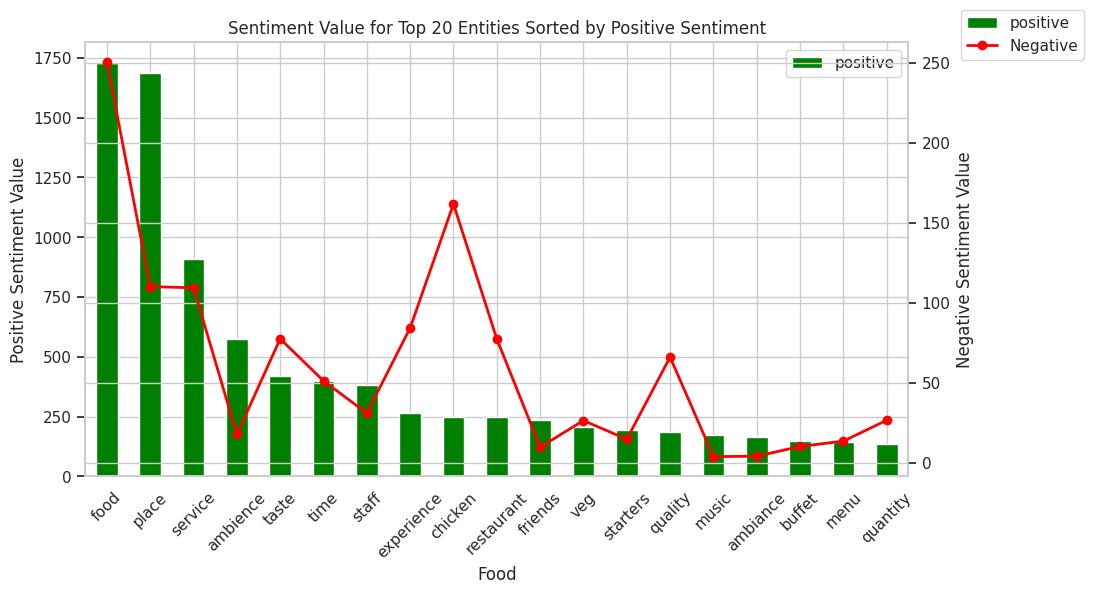

In [ ]:

# Finding the threshold to filter the top values (greater than the 20th highest positive sentiment value)
threshold = food_sentiment_count_df['positive'].sort_values(ascending=False)[19]

# Filtering the DataFrame
top_sentiments_df = food_sentiment_count_df[food_sentiment_count_df['positive'] > threshold].sort_values(by='positive', ascending=False)


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart for positive counts and any other sentiment counts except negative
top_sentiments_df[['positive']].plot(kind='bar', stacked=True, ax=ax, color='green')

# Line chart for negative values
ax2 = ax.twinx()
(top_sentiments_df['negative']*(-1)).plot(kind='line', ax=ax2, color='red', marker='o', linewidth=2, label='Negative')

# Labels and legend
ax.set_xlabel('Food')
ax.set_ylabel('Positive Sentiment Value')
ax2.set_ylabel('Negative Sentiment Value')
ax.set_title('Sentiment Value for Top 20 Entities Sorted by Positive Sentiment')
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.set_xticklabels(top_sentiments_df.index, rotation=45)

plt.tight_layout()
plt.show()


Here are the insights from the chart:

Food is Key: The entities 'food' and 'place' are mentioned the most by a significant margin.

Service Matters: The entity 'service' also shows a high positive sentiment value, indicating it is an important factor for customers.

Negative Sentiments: Even entities with high positive sentiment values have corresponding negative sentiments, as shown by the line graph. This suggests that while certain aspects are generally well-received, there are still notable areas of dissatisfaction.

Consistent Positive Aspects: Entities like 'place', 'service', and 'ambience' consistently have strong positive sentiment values, indicating these are generally favorable aspects of the restaurants in this analysis.

Specific Food Items: The chart shows varying degrees of sentiment for 'chicken' and 'veg', which may reflect differences in the quality or preference for these food items.

Quality Over Quantity: 'Quality' has a higher positive sentiment compared to 'quantity', suggesting that customers prioritize the quality of their meals over the amount.

Less Impactful Entities: Entities such as 'music', 'buffet', 'menu', and 'quantity' have lower positive sentiment values, indicating they have less impact on overall customer satisfaction.

Business Impact:

Positive Impact:

The chart provides valuable insights into which aspects are most appreciated by customers, enabling restaurateurs to focus on maintaining high standards in these areas.
Negative Impact:

Overlooking the entities with high negative sentiment could lead to customer dissatisfaction and poor online reviews, potentially harming the business.

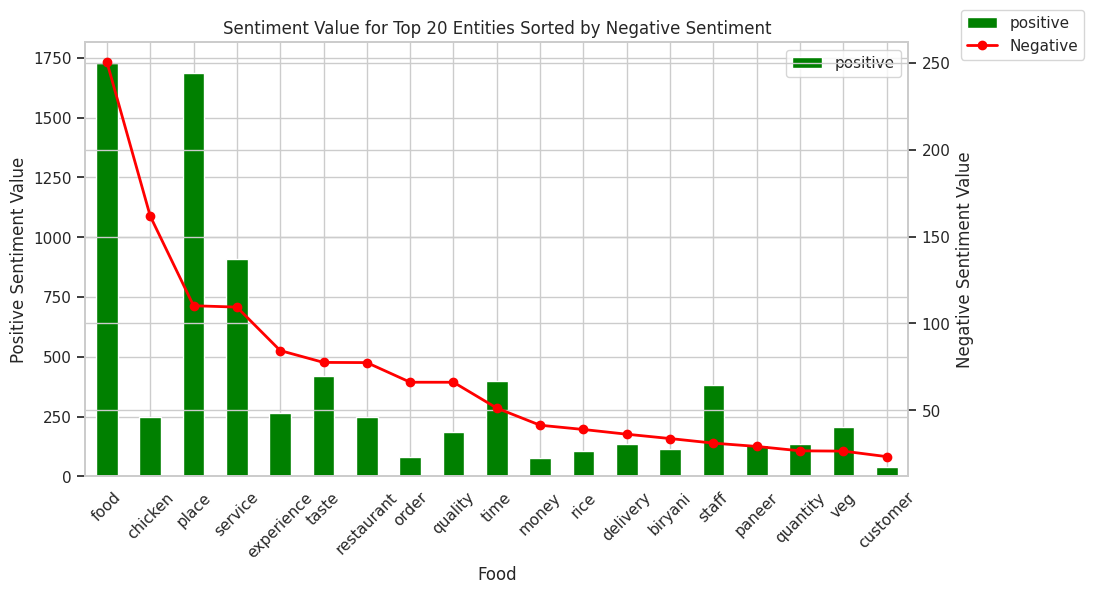

In [ ]:

# Finding the threshold to filter the top values (greater than the 20th highest positive sentiment value)
threshold = food_sentiment_count_df['negative'].sort_values(ascending=True)[19]

# Filtering the DataFrame
top_sentiments_df = food_sentiment_count_df[food_sentiment_count_df['negative'] < threshold].sort_values(by='negative', ascending=True)


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart for positive counts and any other sentiment counts except negative
top_sentiments_df[['positive']].plot(kind='bar', stacked=True, ax=ax, color='green')

# Line chart for negative values
ax2 = ax.twinx()
(top_sentiments_df['negative']*(-1)).plot(kind='line', ax=ax2, color='red', marker='o', linewidth=2, label='Negative')

# Labels and legend
ax.set_xlabel('Food')
ax.set_ylabel('Positive Sentiment Value')
ax2.set_ylabel('Negative Sentiment Value')
ax.set_title('Sentiment Value for Top 20 Entities Sorted by Negative Sentiment')
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.set_xticklabels(top_sentiments_df.index, rotation=45)
plt.tight_layout()
plt.show()


Based on the sentiment values for various entities, sorted by negative sentiment, here are the insights and their potential business impacts:

Food and Place as Major Drivers: 'Food' and 'place' have the highest positive sentiment values, indicating they are crucial drivers of satisfaction. However, they also have the highest negative sentiments, suggesting that when these aspects fall short of expectations, they can significantly detract from the overall experience.

Chicken as a High-Risk Item: Although 'chicken' has a relatively high positive sentiment, it also has a disproportionately high negative sentiment compared to its positive score. This indicates that chicken dishes are critical to get right, as they can greatly influence customer sentiment.

Consistency in Service: 'Service' shows high positive sentiment but also notable negative sentiment. Ensuring consistent service quality could be essential for maintaining overall customer satisfaction.

Experience and Taste: Both 'experience' and 'taste' have substantial positive sentiment but also significant negative sentiment. This implies that while these aspects are often praised, poor experiences and tastes leave a strong negative impression.

Quality Over Speed and Accuracy: 'Quality' has high positive sentiment and relatively lower negative sentiment compared to 'order' and 'time'. This suggests that customers value the quality of their food more than the speed or accuracy of service.

Value for Money: 'Money' has low positive sentiment and a notable negative sentiment, indicating that customers are concerned about the value for money they receive.

Operational Aspects: Negative sentiments for 'order', 'delivery', and 'time' are lower than for 'food', 'chicken', and 'place', but still significant. This suggests that improving operational efficiency in order processing and delivery could be beneficial.

Staff Interaction: 'Staff' has higher positive sentiment and comparatively lower negative sentiment. Good staff interactions can enhance the customer experience, although poor interactions have less impact on negative sentiment compared to factors like food quality or place.

Business Impact:

Positive Impact:

The insights can guide targeted improvements in critical areas such as food quality and ambiance, which significantly affect customer sentiment.
Emphasizing quality over speed may improve overall satisfaction, aligning with customer preferences.
Addressing value for money concerns by reviewing pricing strategies could better meet customer expectations.
Negative Impact:

Ignoring areas with high negative sentiment, especially 'food' and 'place', could lead to customer dissatisfaction and negative reviews.
Neglecting the importance of 'chicken' dishes and overall experience could disproportionately impact the business due to their high negative sentiments relative to positive values.
Balancing strengths and weaknesses based on these insights can enhance customer satisfaction and loyalty, leading to a positive overall business impact.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Creating a copy of the dataset for further feature engineering
from sklearn.preprocessing import MultiLabelBinarizer

# Create a MultiLabelBinarizer
mlb = MultiLabelBinarizer()
features = mlb.fit_transform(restaurant_data.Cuisines_list)

# Create a DataFrame with the cuisine labels
features_df = pd.DataFrame(features, columns=mlb.classes_)

# Add resataurant name and cost to the features dataFrame
features_df['Cost'] = restaurant_data['Cost']
features_df['Name'] = restaurant_data['Name']

#features_df['avg_rating'] = restaurant_data_ratings['Rating']
features_df.set_index('Name', inplace=True)
features_df

,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,...,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Cost
Name,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,800.0
Paradise,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,800.0
Flechazo,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1300.0
Shah Ghouse Hotel & Restaurant,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,800.0
Over The Moon Brew Company,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sweet Basket,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,200.0
Angaara Counts 3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,500.0
Wich Please,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,250.0


In [ ]:
features_df['Avg_Ratings'] = reviews.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False)

# Fill Missing Ratings and Cost values with mean
features_df['Avg_Ratings'].fillna(value = features_df['Avg_Ratings'].mean(), inplace = True)
features_df['Cost'].fillna(value = features_df['Cost'].mean(), inplace = True)

In [ ]:
# Select only the cuisines that occure more than once
selected_features = features_df.columns[features_df.sum(axis=0)>7].tolist()
selected_features

['asian',
 'biryani',
 'chinese',
 'continental',
 'desserts',
 'fastfood',
 'italian',
 'northindian',
 'southindian',
 'Cost',
 'Avg_Ratings']

 Clustering Analysis

## ***7. Clusturing***

 **Implementing K-Means**

In [ ]:
selected_features

['asian',
 'biryani',
 'chinese',
 'continental',
 'desserts',
 'fastfood',
 'italian',
 'northindian',
 'southindian',
 'Cost',
 'Avg_Ratings']

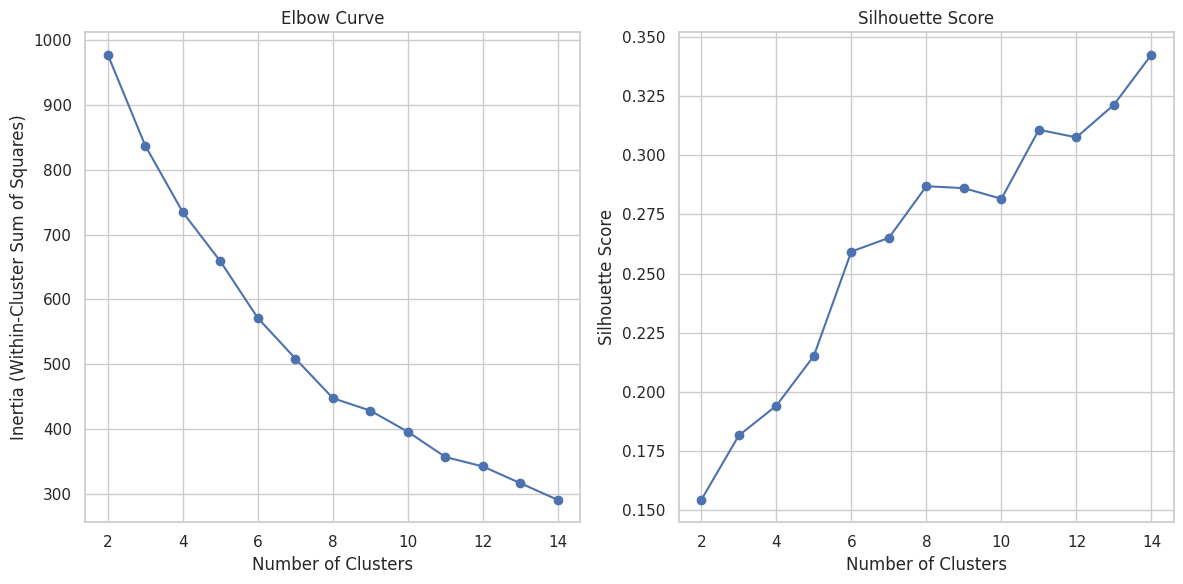

Optimal number of clusters: 14


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#X = features_df
X= StandardScaler().fit_transform(features_df[selected_features])

# Define a range of cluster numbers to try
cluster_range = range(2, 15)  # You can adjust this range as needed

# Initialize lists to store the inertia (within-cluster sum of squares) and silhouette scores
inertia_values = []
silhouette_scores = []

# Perform K-means clustering for each cluster number in the range
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters,init='k-means++', random_state=42)
    kmeans.fit(X)

    # Calculate the inertia and silhouette score for this cluster number
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')

# Plot the silhouette score to evaluate cluster quality
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Based on the plots, you can choose the optimal number of clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")


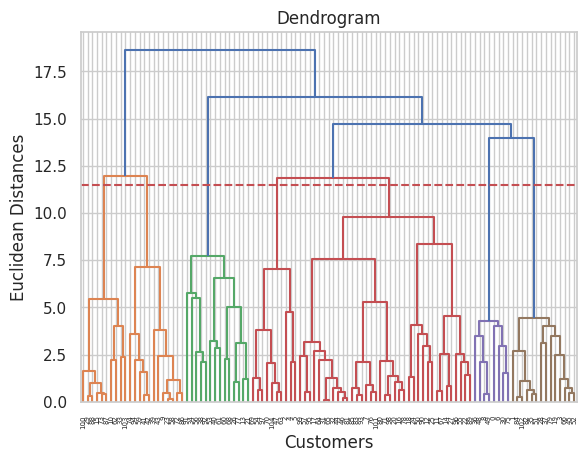

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=11.5, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

## No.of cluster = 7

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering on the t-SNE transformed data
hc = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
features_df['Cluster'] = hc.fit_predict(X)


In [ ]:
results_df = features_df[selected_features+['Cluster']]
results_df

,asian,biryani,chinese,continental,desserts,fastfood,italian,northindian,southindian,Cost,Avg_Ratings,Cluster
Name,,,,,,,,,,,,
Beyond Flavours,0,0,1,1,0,0,0,1,1,800.000000,4.280000,4
Paradise,0,1,1,0,0,0,0,1,0,800.000000,4.700000,3
Flechazo,1,0,0,0,1,0,0,1,0,1300.000000,4.660000,6
Shah Ghouse Hotel & Restaurant,0,1,1,0,0,0,0,1,0,800.000000,3.210000,3
Over The Moon Brew Company,1,0,1,1,0,0,0,1,0,1200.000000,4.340000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
Sweet Basket,0,0,0,0,0,1,0,0,0,200.000000,3.604777,5
Angaara Counts 3,0,0,0,0,0,0,0,0,0,500.000000,3.604777,0
Wich Please,0,1,1,0,0,0,0,1,0,250.000000,3.604777,3


In [ ]:
results_df_grouped = results_df.groupby('Cluster').sum()
results_df_grouped[['Cost','Avg_Ratings']] = results_df[['Cost','Avg_Ratings','Cluster']].groupby('Cluster').mean()
results_df_grouped

,asian,biryani,chinese,continental,desserts,fastfood,italian,northindian,southindian,Cost,Avg_Ratings
Cluster,,,,,,,,,,,
0,0,0,15,6,0,0,0,23,0,982.432432,3.656790
1,0,1,0,1,12,5,0,0,0,625.000000,3.671110
2,5,0,5,9,0,0,14,11,1,1050.000000,3.581176
3,0,14,12,1,0,0,0,13,0,732.142857,3.526413
4,0,1,5,2,0,0,0,8,8,681.250000,3.483750
5,0,0,1,0,0,10,0,3,0,670.000000,3.308026
6,10,0,5,2,1,0,0,3,0,946.105769,3.869049


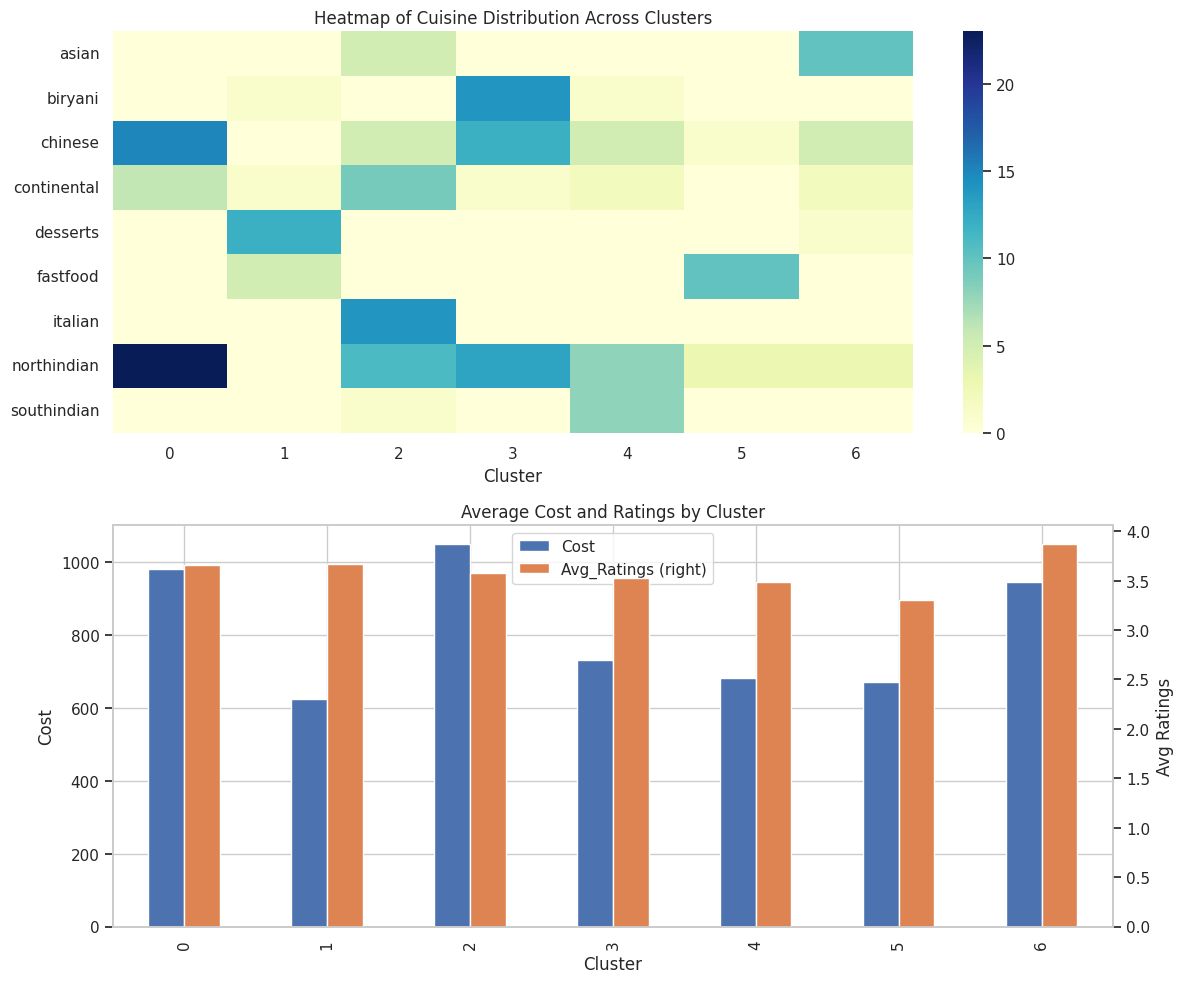

In [ ]:
#@title Cuisine Distribution Across Clusters
# Preparing the data for heatmap
cuisine_data = results_df_grouped.drop(['Cost', 'Avg_Ratings'], axis=1)
cost_ratings_data = results_df_grouped[['Cost', 'Avg_Ratings']]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Heatmap for cuisine distribution
sns.heatmap(cuisine_data.T, cmap="YlGnBu", ax=ax[0])  # Transposing for better layout
ax[0].set_title('Heatmap of Cuisine Distribution Across Clusters')

# Grouped bar chart for cost and ratings
cost_ratings_data.plot(kind='bar', ax=ax[1], secondary_y='Avg_Ratings')
ax[1].set_title('Average Cost and Ratings by Cluster')
ax[1].set_ylabel('Cost')
ax[1].right_ax.set_ylabel('Avg Ratings')

plt.tight_layout()
plt.show()


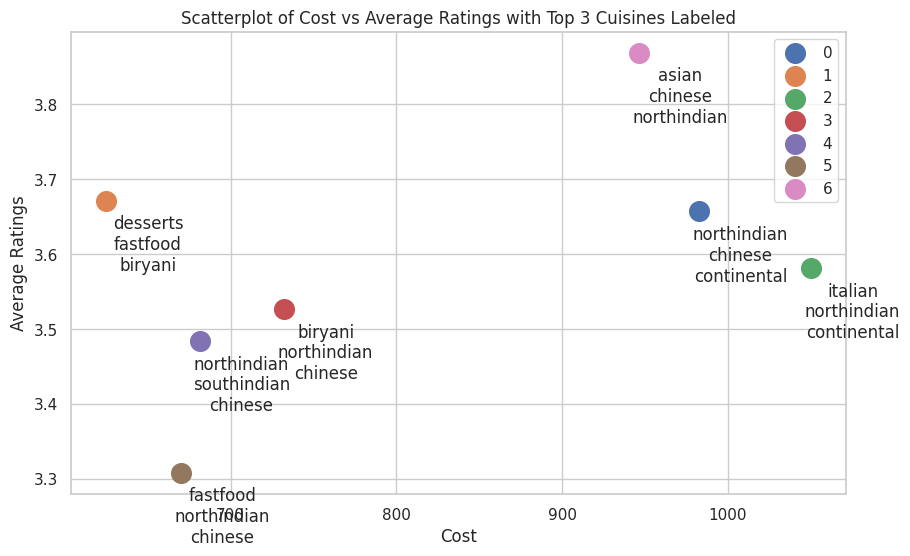

In [ ]:
#@title Scatterplot of Cost vs Average Ratings with Top 3 Cuisines Labeled
df = results_df_grouped.reset_index()

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
for i, row in df.iterrows():
    plt.scatter(row['Cost'], row['Avg_Ratings'],s=200, label=f"{int(row['Cluster'])}")
    top_cuisines = row.drop(['Cluster', 'Cost', 'Avg_Ratings']).nlargest(3)
    i = 0
    for cuisine, value in top_cuisines.items():
        if value > 0:
            plt.annotate(cuisine, (row['Cost'], row['Avg_Ratings']), textcoords="offset points", xytext=(30,-20-i*15), ha='center')
            i+=1
plt.xlabel('Cost')
plt.ylabel('Average Ratings')
plt.title('Scatterplot of Cost vs Average Ratings with Top 3 Cuisines Labeled')
plt.legend()
plt.grid(True)
plt.show()

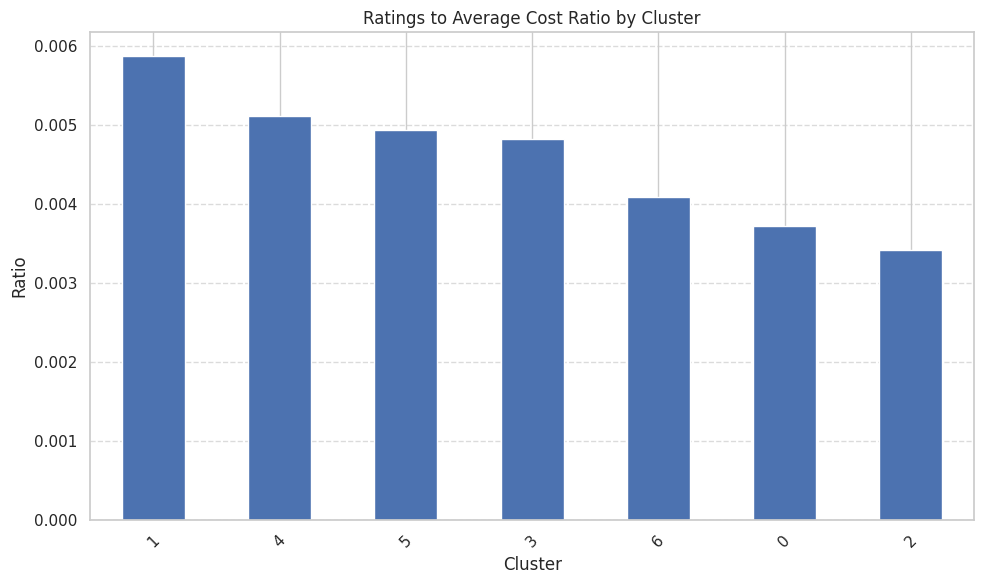

In [ ]:
#@title Ratings to Average cost Ratio
ax = (cost_ratings_data.Avg_Ratings/cost_ratings_data.Cost).sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
# Adding labels and title
plt.title('Ratings to Average Cost Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

# **Conclusion**



## Cluster Analysis
Cluster 1 features moderate costs and ratings, with a high ratio of ratings to cost. It includes a diverse range of cuisines such as desserts, continental, biryani, and Chinese, suggesting a good balance of quality, price, and variety. This cluster likely appeals to customers seeking a satisfying and reasonably priced dining experience.

Cluster 2 has the highest average cost and ratings, indicating it consists of high-end restaurants that provide premium quality and service. The predominant cuisines in this cluster are Italian and Asian, reflecting popular and profitable choices for upscale dining.

Cluster 5 offers the second highest average ratings but at a lower cost compared to Cluster 2. It features a large proportion of Asian restaurants, suggesting that this cuisine is both well-liked and affordable. This cluster also includes some continental and Chinese options, catering to a diverse range of tastes.

Cluster 4 has the lowest average ratings but a moderate cost. It is primarily made up of biryani and Chinese restaurants, which may indicate these cuisines are either oversaturated or underperforming. The low ratings could point to issues with quality, service, or hygiene.

Cluster 6 has the lowest average cost and also low ratings. It mainly consists of fast food restaurants, which cater to budget-conscious or time-pressed customers. However, the low ratings suggest these establishments may not provide significant value or satisfaction.

Clusters 0 and 3 have similar costs and ratings but feature different cuisines. Cluster 0 includes mostly North Indian and Chinese restaurants, while Cluster 3 focuses on South Indian and continental options. These clusters likely reflect regional and cultural preferences as well as the market competition for these cuisines.

## **Summary of Business Case Solutions Based on Insights:**

Enhancing Food and Ambiance:

Invest in improving the quality and ambiance of restaurants to address the high negative sentiment associated with food and place.
Focused Improvement for Chicken Dishes:

Develop and implement a targeted strategy to enhance the quality of chicken dishes, given their significant impact on both positive and negative sentiments.
Ensuring Consistent Service Quality:

Introduce comprehensive training programs for staff to ensure consistent service quality, recognizing its critical role in overall customer satisfaction.
Maintaining High Standards for Experience and Taste:

Conduct regular quality assessments to sustain positive sentiments related to experience and taste, and address any issues promptly to minimize negative impacts.
Prioritizing Food Quality Over Speed and Accuracy:

Shift operational focus to emphasize food quality over speed and accuracy, aligning with customer preferences.
Revising Value for Money Strategies:

Review and adjust pricing strategies to better align with customer expectations and communicate value-added services to address concerns about value for money.
Leveraging Cluster Insights:

Provide tailored insights to restaurants based on their cluster categorization, enabling them to develop strategies for targeted improvement or expansion.
Promoting Diverse Cuisine Offerings:

Encourage restaurants to expand their cuisine options based on cluster insights to cater to a wider range of customer preferences.
These solutions aim to guide Zomato and its partner restaurants in addressing key areas for improvement, enhancing customer satisfaction, and supporting sustainable business growth.